<a href="https://colab.research.google.com/github/LucasFerrSil/GrafosDoBitcoin/blob/main/CR_METRICAS_GRAFOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
resumos = [pd.read_csv(f'/content/drive/My Drive/CR/Edges-2023-0{i+1}.csv', sep=";") if i not in [6,7] else pd.read_csv(f'/content/drive/My Drive/CR/Edges-2023-0{i+1}.csv', sep=",") for i in range(10)]


,Source,Target,Weight
0,Inicial,38XnPvu9PmonFU9WouPXUjYbW91wa5MerL,6.285597e+08
1,1KZ6KTbFN7UbNJVDW1A1X4KDyRoCiaPJqZ,3HRoVGh88gz32YygxnaWV6gqLfmFh9Yp2W,1.288000e+05
2,1KZ6KTbFN7UbNJVDW1A1X4KDyRoCiaPJqZ,1BZ8wkFHVJsmvtQACeJS9MevHue2DuDSii,3.589970e+05
3,3Da6cHW8tJUMJ1iohJQWznkZzGqL2dhwas,1BZ8wkFHVJsmvtQACeJS9MevHue2DuDSii,3.589970e+05
4,3Da6cHW8tJUMJ1iohJQWznkZzGqL2dhwas,3HRN6jNxUtxXhnWGayVusaWNXVHomthiyF,1.230927e+02
...,...,...,...
7327,bc1pszjff0r0686d07xfesnu8g3vps4r48uc2klqy36ajy...,bc1qv7d2dgyvtctv7ya4t3ysy4c2s8qz4nm8t6dvm3,3.300000e+02
7328,bc1pywrysk900jeg8y99uknrklwd93xpfuxwcelaeh6mfw...,bc1qv7d2dgyvtctv7ya4t3ysy4c2s8qz4nm8t6dvm3,3.300000e+02
7329,bc1prhlg35qpmnlxpxvu42e557jr5x2ca2h2pcvqggl572...,bc1qv7d2dgyvtctv7ya4t3ysy4c2s8qz4nm8t6dvm3,3.300000e+02
7330,bc1px0pcs6j08atg36urfehnuwr46h47utcpc2ud4plhhu...,bc1qv7d2dgyvtctv7ya4t3ysy4c2s8qz4nm8t6dvm3,3.300000e+02


In [ ]:
inputs = [list(resumos[i]['Source']) for i in range(len(resumos))]

In [ ]:
arestas = []
for i in range(len(resumos)):
  edges = []
  for j in range(len(resumos[i]['Source'])):
    edges.append( (resumos[i]['Source'][j],resumos[i]['Target'][j],resumos[i]['Weight'][j]) )
  arestas.append(edges)

In [ ]:
G = []

for i in range(len(arestas)):
  x = nx.DiGraph()
  x.add_weighted_edges_from(arestas[i])
  G.append(x)

In [ ]:
c = [nx.closeness_centrality(G[i]) for i in range(len(G))]

In [ ]:
valores = [list(c[i].values()) for i in range(len(c))]

In [ ]:
distribuicao_centralidade_closeness = dcc = [distribuicao(valores[i]) for i in range(len(valores))]

In [ ]:
dados = []
for i in range(len(dcc)):
  termo = []
  for j in range(len(dcc[i][0])):
    termo.append([dcc[i][0][j],dcc[i][1][j]])
  dados.append(termo)

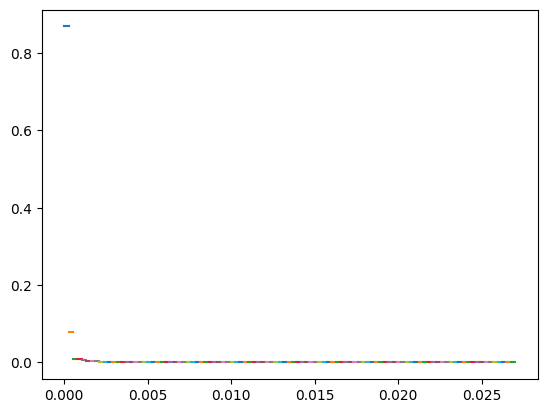

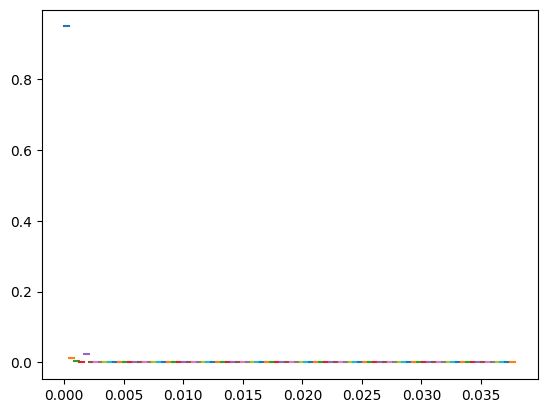

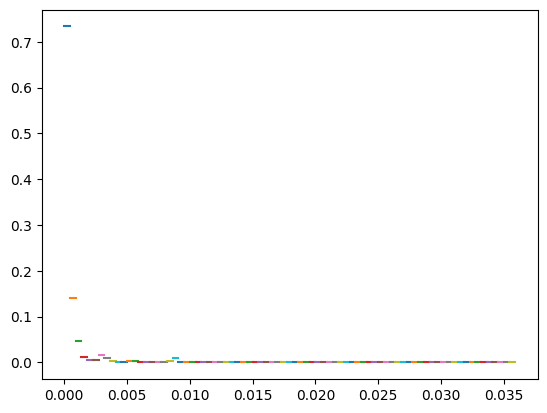

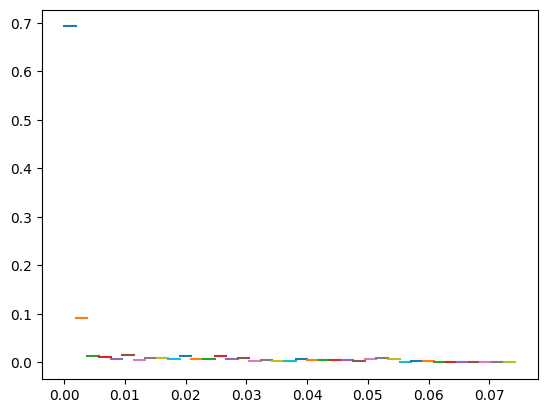

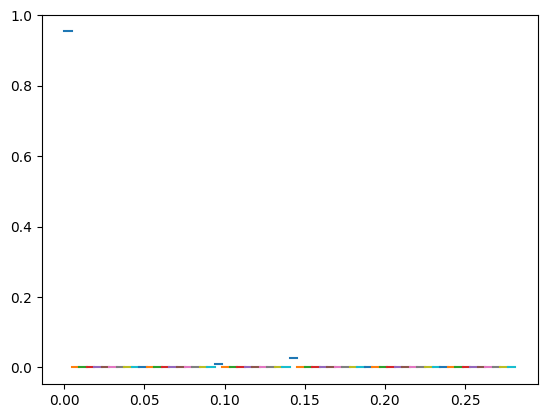

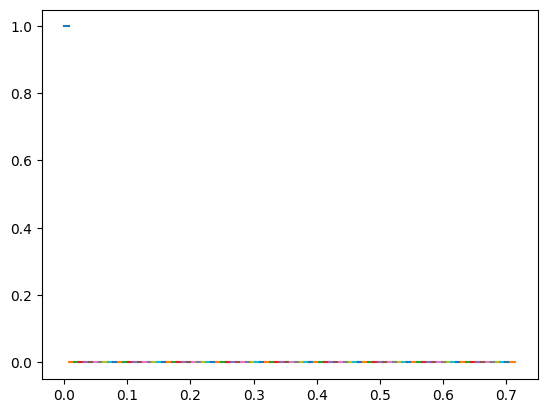

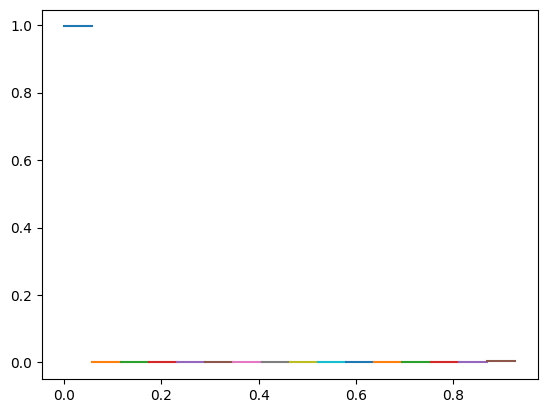

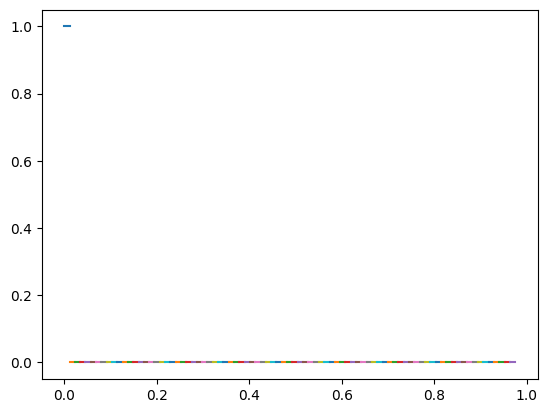

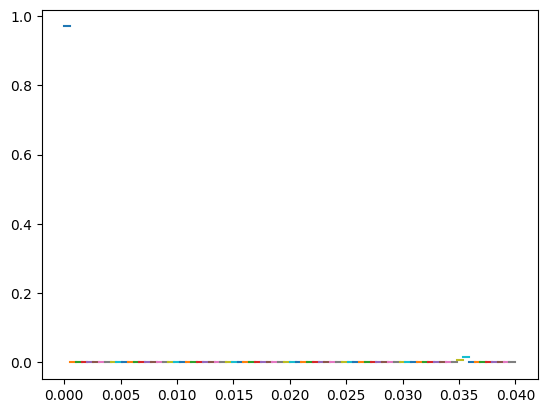

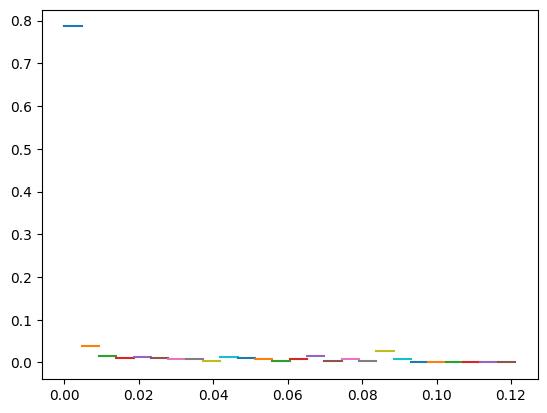

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for dado in dados:
  plt.figure()
  for i in range(len(dado)):
    x = np.linspace(dado[i][0][0],dado[i][0][1])
    y = dado[i][1] + x - x
    plt.plot(x,y)
  plt.show()

In [ ]:
media = []
mes = ['01/2023','02/2023','03/2023','04/2023','05/2023','06/2023','07/2023','08/2023','09/2023','10/2023']
for i in range(len(dados)):
  termo = 0
  x = []
  for j in range(len(dados[i])):
    termo += (dados[i][j][0][1]+dados[i][j][0][0])*dados[i][j][1]/2
  media.append([mes[i],termo*1000000])
df = pd.DataFrame(media,columns=['Mês','Média da Centralidade dos nós'])
display(df)
print(media)

,Mês,Média da Centralidade dos nós
0,01/2023,243.231084
1,02/2023,373.071600
2,03/2023,698.586905
3,04/2023,6993.324058
4,05/2023,7831.068834
5,06/2023,3981.688510
6,07/2023,32284.073042
7,08/2023,5864.598828
8,09/2023,1249.306803
9,10/2023,11213.528632


[['01/2023', 243.23108421366064], ['02/2023', 373.07160003092076], ['03/2023', 698.5869051611222], ['04/2023', 6993.324058422626], ['05/2023', 7831.0688335281475], ['06/2023', 3981.688510115741], ['07/2023', 32284.07304173813], ['08/2023', 5864.5988282441185], ['09/2023', 1249.3068031923585], ['10/2023', 11213.5286316016]]


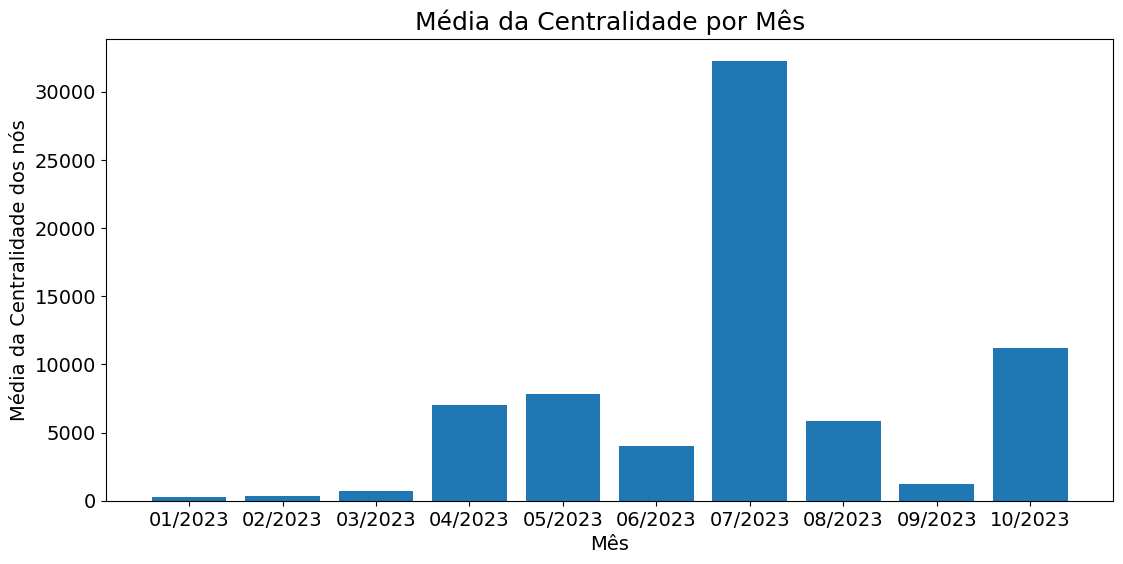

In [ ]:

# Plotando o DataFrame
plt.figure(figsize=(13, 6))
plt.bar(df['Mês'], df['Média da Centralidade dos nós'])
plt.xlabel('Mês',fontdict={'size': 14})
plt.ylabel('Média da Centralidade dos nós',fontdict={'size': 14})
plt.title('Média da Centralidade por Mês',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Salvando como imagem PNG
plt.savefig('imagem_grafico.png')

# Exibindo o gráfico (opcional)
plt.show()


In [ ]:
def distribuicao(lista):
  minl = min(lista)
  maxl = max(lista)
  n = int(len(lista)**(1/2))
  inter = ((maxl-minl)/n)
  x = []
  for i in range(n):
    v = 0
    for j in range(len(lista)):
      if(minl+inter*i <= lista[j] and lista[j] <= (minl+inter*(i+1))):
        v += 1
    x.append(v)
  soma = sum(x)
  f = [x[i]/soma for i in range(len(x))]
  intervalo = [[minl+inter*i,minl+inter*(i+1)] for i in range(n)]
  return intervalo,f

In [ ]:
arestas_2023 = [pd.read_csv(f'/content/drive/My Drive/CR/Edges-2023-0{i}.csv', sep=";") if (i not in [7,8]) else pd.read_csv(f'/content/drive/My Drive/CR/Edges-2023-0{i}.csv', sep=",") for i in range(1,11)]
valores = [list(arestas_2023[i]['Weight']) for i in range(len(arestas_2023))]
distribuicaototal = [distribuicao(valores[i]) for i in range(len(valores))]
total = [sum(valores[i]) for i in range(len(valores))]


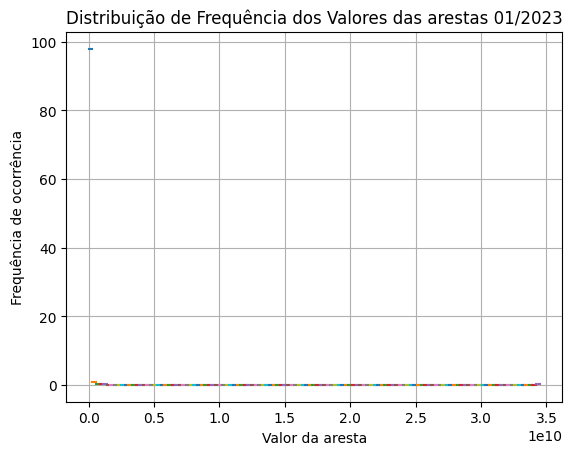

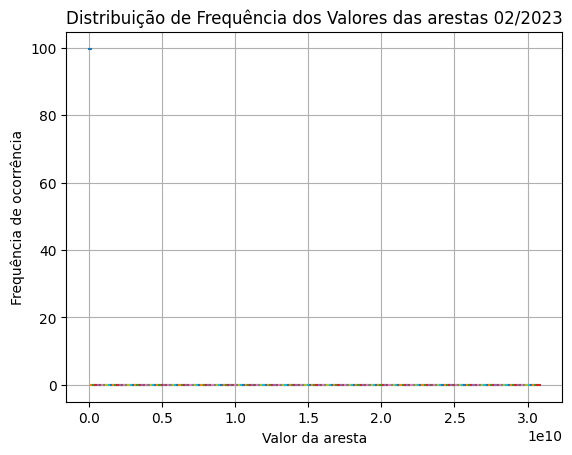

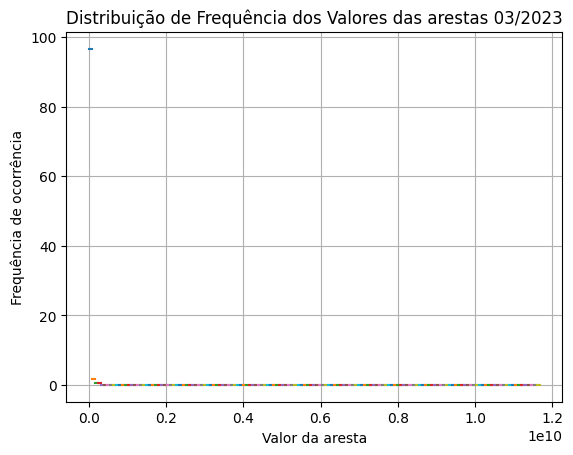

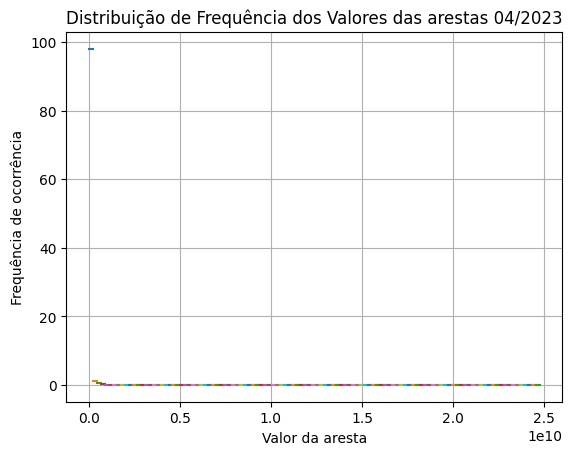

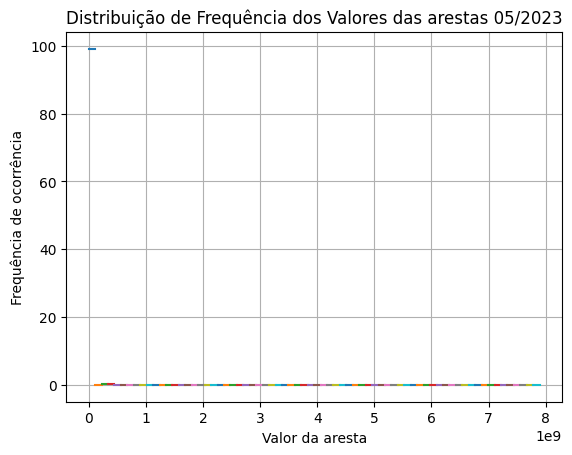

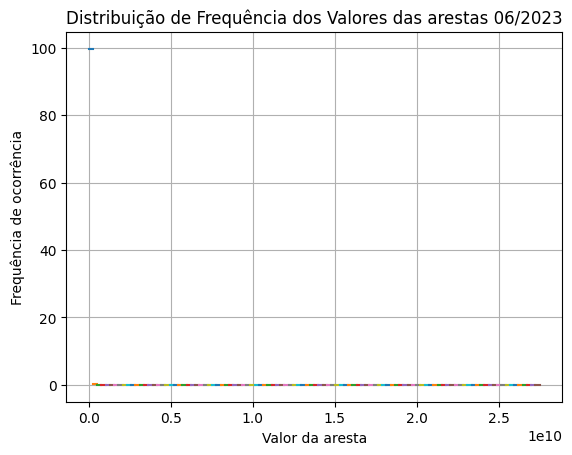

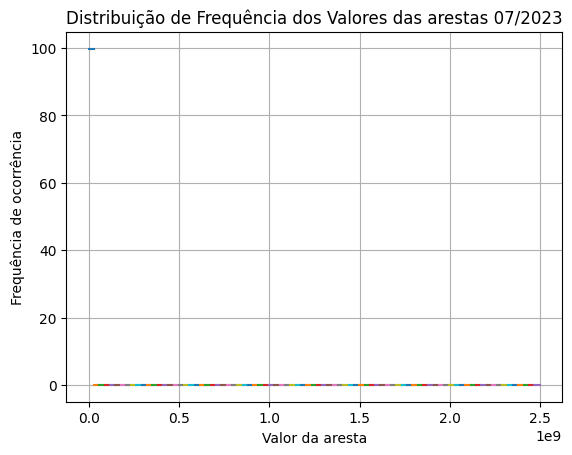

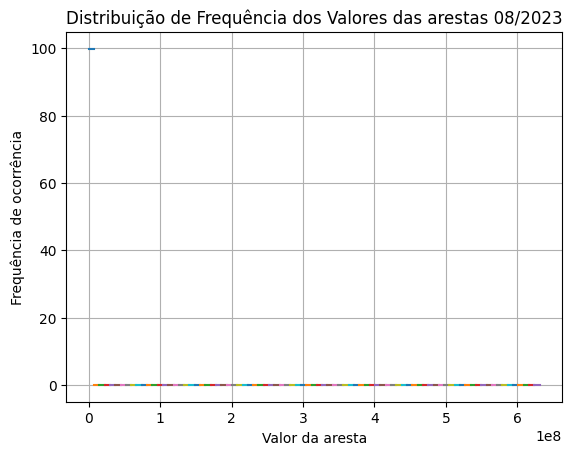

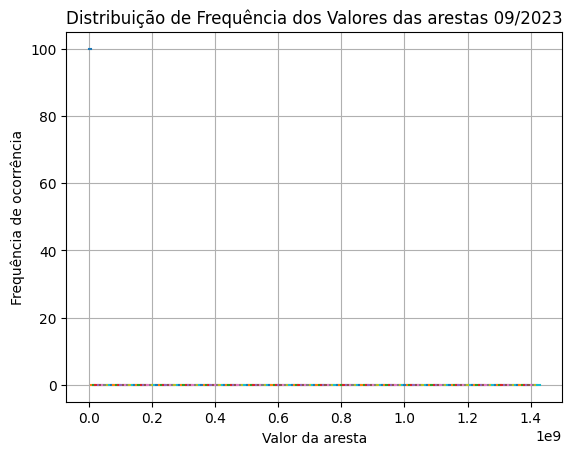

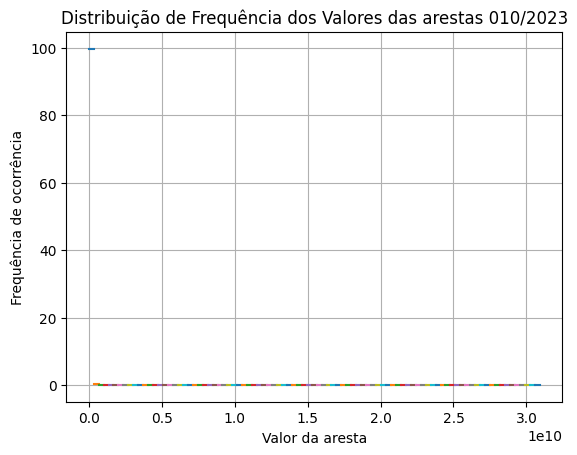

In [ ]:
plt.figure()
import numpy as np
j = 1
for distribuicaoval in distribuicaototal:
  plt.title(f'Distribuição de Frequência dos Valores das arestas 0{j}/2023')
  j += 1
  for i in range(len(distribuicaoval[0])):
    x = np.linspace(distribuicaoval[0][i][0],distribuicaoval[0][i][1])
    y = x - x + distribuicaoval[1][i]*100
    plt.plot(x,y)
  plt.xlabel('Valor da aresta')
  plt.ylabel('Frequência de ocorrência')
  plt.grid()
  plt.savefig(f'aaaaa{j}.png')
  plt.show()



In [ ]:
i = 0
porcentagem = []
valor1 = []
valor2 = []
for distribuicaoval in distribuicaototal:
  e = (distribuicaoval[0][0][0]+distribuicaoval[0][0][1])*distribuicaoval[1][0]/2
  razao = e*100/total[i]
  i += 1
  valor1.append(100-razao)
  valor2.append(100-distribuicaoval[1][0]*100)
media_val1 = sum(valor1)/len(valor1)
media_val2 = sum(valor2)/len(valor2)

print(media_val1,media_val2)

99.92712970932757 0.9974055198745532
